<a href="https://colab.research.google.com/github/cabroderick/ML-AM-MQP/blob/main/make_predictions.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Code to make predictions on images with pre-trained weights**

In [ ]:
!python --version

Python 3.7.12


In [1]:
# uninstall improper package versions
!pip uninstall keras -y
!pip uninstall keras-nightly -y
!pip uninstall keras-Preprocessing -y
!pip uninstall keras-vis -y
!pip uninstall tensorflow -y
!pip uninstall h5py -y

In [2]:
# reinstall with proper versions
!pip install tensorflow==1.13.1
!pip install keras==2.0.8
!pip install h5py==2.10.0

     |████████████████████████████████| 92.6 MB 55 kB/s 
     |████████████████████████████████| 42 kB 1.1 MB/s 
     |████████████████████████████████| 50 kB 6.0 MB/s 
     |████████████████████████████████| 367 kB 54.5 MB/s 
     |████████████████████████████████| 3.2 MB 16.5 MB/s 
     |████████████████████████████████| 4.1 MB 49.2 MB/s 
  Attempting uninstall: tensorflow-estimator
    Found existing installation: tensorflow-estimator 2.7.0
    Uninstalling tensorflow-estimator-2.7.0:
      Successfully uninstalled tensorflow-estimator-2.7.0
  Attempting uninstall: tensorboard
    Found existing installation: tensorboard 2.7.0
    Uninstalling tensorboard-2.7.0:
      Successfully uninstalled tensorboard-2.7.0
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
kapre 0.3.6 requires tensorflow>=2.0.0, but you have tensorflow 1.13.1 which is incompatible.
     |██

In [3]:
# import mask rcnn and set up
%cd
!git clone https://github.com/matterport/Mask_RCNN.git
%cd Mask_RCNN/
!python setup.py install
!pip show mask-rcnn

/root
fatal: destination path 'Mask_RCNN' already exists and is not an empty directory.
/root/Mask_RCNN
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'description-file' will not be supported in future versions. Please use the underscore name 'description_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'license-file' will not be supported in future versions. Please use the underscore name 'license_file' instead
  % (opt, underscore_opt))
/usr/local/lib/python3.7/dist-packages/setuptools/dist.py:700: UserWarning: Usage of dash-separated 'requirements-file' will not be supported in future versions. Please use the underscore name 'requirements_file' instead
  % (opt, underscore_opt))
running install
running bdist_egg
running egg_info
writing mask_rcnn.egg-info/PKG-INFO
writing dependency_links to mask_rcnn.egg-info/dependency_links.txt
writing t

In [16]:
# imports
from keras.preprocessing.image import load_img
from keras.preprocessing.image import img_to_array
from mrcnn.config import Config
from mrcnn.model import MaskRCNN
from mrcnn import utils
import mrcnn.model as modellib
from mrcnn import visualize
from mrcnn.model import log
from matplotlib import pyplot
from matplotlib.patches import Rectangle
from cv2 import imread
import os
import json
import numpy as np
import urllib.request
import sys
import skimage
import cv2

In [28]:
# specify paths for prediction
WEIGHTS_PATH = '/root/custom_mrcnn.h5'
IMG_PATH = '/root/A1H6COL_318.tif'
CLASS_NAMES = ['gas entrapment porosity', 'lack of fusion porosity', 'keyhole porosity']

In [29]:
# configure inference model
class InferenceConfig(Config):
    NAME = 'inference'
    GPU_COUNT = 1
    IMAGES_PER_GPU = 1
    NUM_CLASSES = 4

model = MaskRCNN(mode='inference',
                 config=InferenceConfig(), model_dir='./')

model.load_weights(filepath=WEIGHTS_PATH, by_name=True)

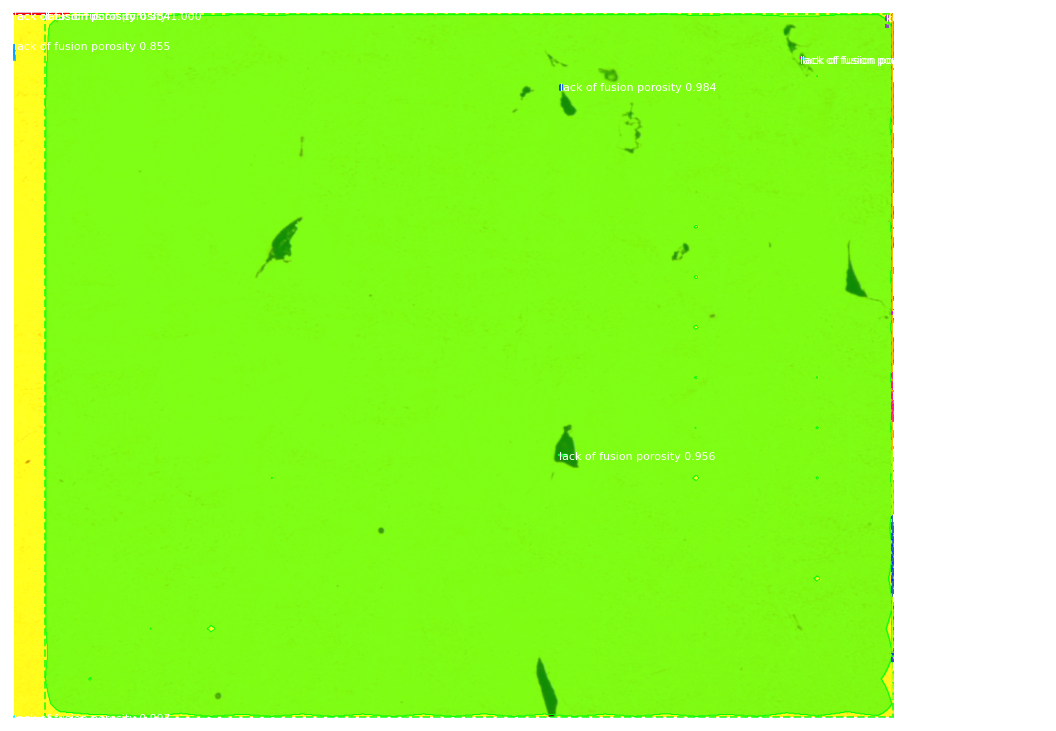

In [30]:
# make prediction & visualize

image = cv2.imread(IMG_PATH)
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

r = model.detect([image], verbose=0)

r = r[0]

visualize.display_instances(image=image,
                                  boxes=r['rois'],
                                  masks=r['masks'],
                                  class_ids=r['class_ids'],
                                  class_names=CLASS_NAMES,
                                  scores=r['scores'])